Importing the libraries

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Precessing

In [52]:
#loading the csv data to a pandas dataframe

gold_data = pd.read_csv('gld_price_data.csv')

In [53]:
# first 5 rows 

gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [54]:
#number of rows and columns

gold_data.shape

(2290, 6)

In [55]:
#getting some basic information about data

gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [56]:
#checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [57]:
# Getting statistical measures of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


CORRELATION

1.Positive Correlation

2.Negative Correlation

In [58]:
correlation = gold_data.iloc[:,1:].corr()

<Axes: >

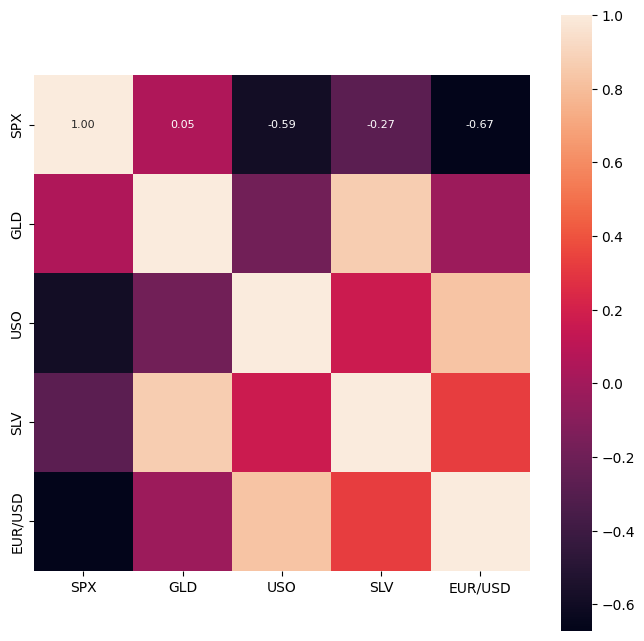

In [59]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8 })

In [60]:
# correlation values of gold
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

C:\Users\Trishank\AppData\Local\Temp\ipykernel_7648\1088107769.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='red')
c:\Users\Trishank\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Trishank\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to

<Axes: xlabel='GLD', ylabel='Density'>

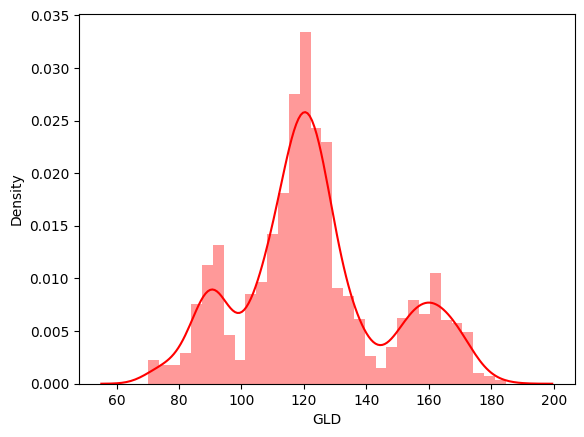

In [61]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='red')

Splitting the features and target

In [62]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [63]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


Splitting into training data and test data

In [64]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [65]:
X_train.head()

,SPX,USO,SLV,EUR/USD
476,1138.500000,39.790001,16.889999,1.361693
1958,2202.939941,10.630000,15.800000,1.063886
248,700.820007,24.480000,12.770000,1.256408
2231,2656.000000,11.890000,15.570000,1.225280
1325,1838.880005,33.040001,19.420000,1.366998


Model Training: Random Forest Regressor

In [66]:
regressor = RandomForestRegressor(n_estimators=100)

In [67]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation


In [68]:
# Prediction on test data
test_data_prediction = regressor.predict(X_test)

In [69]:
print(test_data_prediction)

[168.51099945  81.81549997 116.36620041 127.71940066 120.97840095
 154.64169797 150.29189844 126.2118003  117.47879885 125.91850096
 116.59330139 172.09870024 141.96389831 168.04429911 115.11739995
 117.81560037 140.51410234 170.08500113 158.94960307 157.18389959
 155.16620017 125.16850022 176.0808993  156.5820032  125.17440033
  93.88669955  77.75410021 120.42909996 119.05629928 167.62989958
  88.43460102 125.01259954  91.23870081 117.83040021 121.18859893
 136.99890097 115.52790111 115.36340085 146.80710007 107.16970148
 104.1162022   87.15889774 126.54050094 118.28980026 152.21819903
 119.65290005 108.42079979 107.92889815  93.27460055 127.01369839
  74.54600045 113.70299961 121.23319982 111.35639895 118.94459894
 120.92709909 158.23619931 168.60600099 147.26459687  85.87819842
  94.2599001   86.87419867  90.72089996 119.00310068 126.47620045
 127.37640027 169.13589934 122.32659923 117.38619888  98.7076006
 168.45580171 142.90619818 131.38430203 121.10820212 120.75709968
 119.553300

In [70]:
# R squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared error : ",error_score)

R squared error :  0.9882222898761719


Compare the Actual values and Predicted va;ues in a plot

In [71]:
Y_test = list(Y_test)

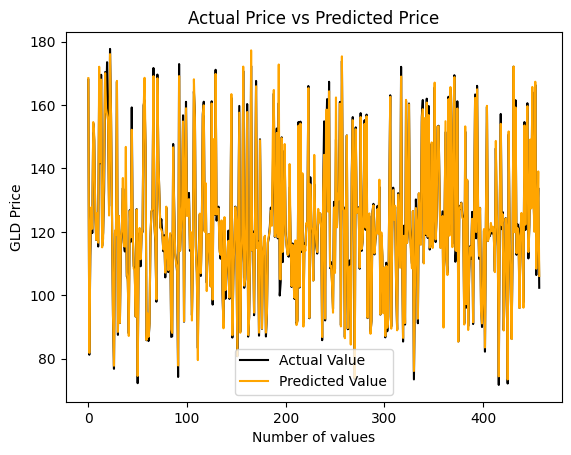

In [72]:
plt.plot(Y_test, color='black', label = 'Actual Value')
plt.plot(test_data_prediction, color='orange', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [73]:
input_data = (1447.160034,78.470001,15.1800,1.471692)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction =  regressor.predict(input_data_reshaped)[0]

c:\Users\Trishank\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [74]:
prediction

84.94700000999997

In [75]:
import pickle 

In [76]:
pickle.dump(regressor, open('model.pkl','wb'))